In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb
import numpy as np
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.random_projection import SparseRandomProjection
from sklearn.preprocessing import LabelEncoder

In [ ]:
#upload file dataset
uploaded = files.upload()

Saving dataset_final.csv to dataset_final.csv


In [ ]:
# Describe dataset
df = pd.read_csv("dataset_final.csv")  # Ganti dengan nama file yang diunggah
# print(df.head())  # Menampilkan 5 baris pertama

# print(df.isnull().sum())  # Menampilkan jumlah missing values di setiap kolom

df.describe(include = "all")

,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,tempmax,tempmin,humidity,dew,...,precipcover,windgust,windspeed,winddir,cloudcover,visibility,solarradiation,solarenergy,uvindex,kategori
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,...,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.554862,0.622011,0.529507,0.362632,0.398585,0.385502,0.516187,0.522090,0.560883,0.679766,...,0.061923,0.283301,0.118763,0.534251,0.488270,0.509777,0.584368,0.584834,0.731050,0.530066
std,0.222357,0.286855,0.243373,0.327885,0.210328,0.225397,0.147641,0.121710,0.173734,0.153606,...,0.091159,0.153651,0.063698,0.316813,0.152918,0.135036,0.145225,0.144262,0.167592,0.242047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.434109,0.477833,0.354839,0.098765,0.255034,0.218182,0.448980,0.433071,0.444079,0.605042,...,0.000000,0.169972,0.081340,0.208020,0.387111,0.413793,0.513948,0.516981,0.625000,0.500000
50%,0.589147,0.709360,0.591398,0.222222,0.355705,0.354545,0.540816,0.535433,0.573684,0.705882,...,0.050042,0.240793,0.108453,0.695628,0.480969,0.517241,0.606334,0.607547,0.750000,0.500000
75%,0.697674,0.842365,0.731183,0.493827,0.503356,0.518182,0.622449,0.574803,0.681579,0.789916,...,0.099964,0.359773,0.151515,0.806948,0.586938,0.586207,0.683951,0.683019,0.875000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


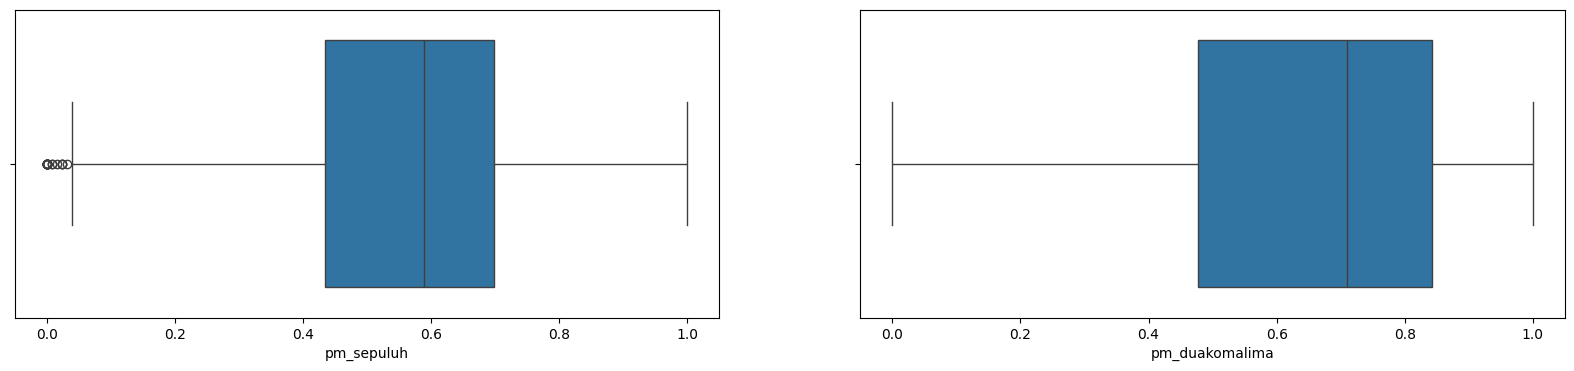

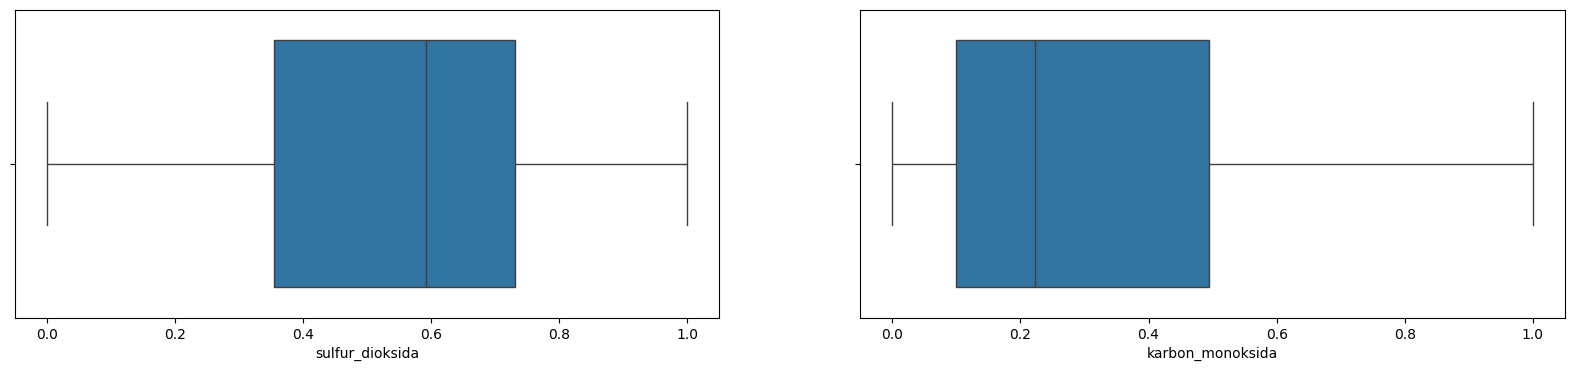

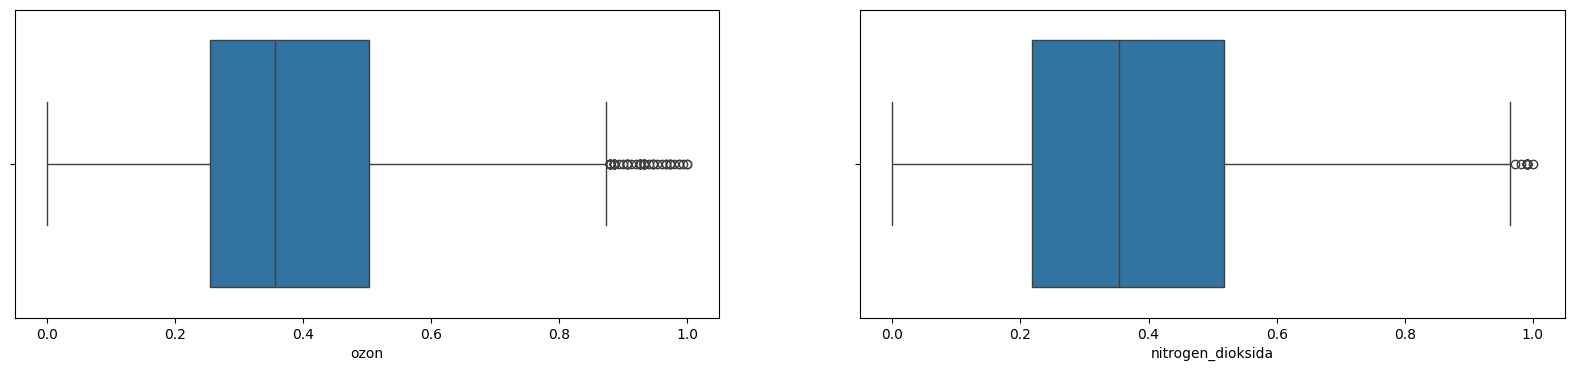

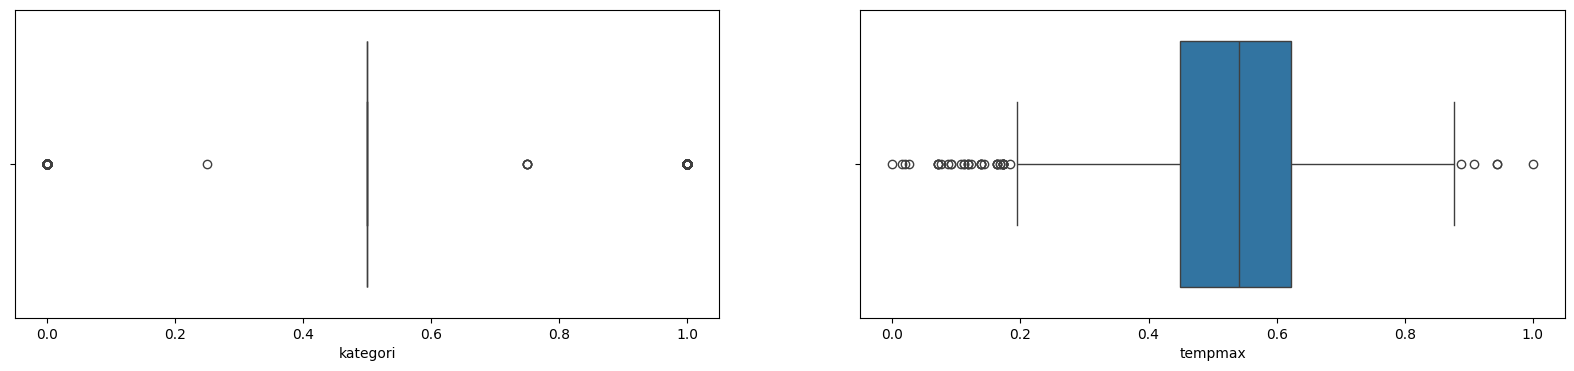

In [ ]:
## plot for numerical columns, and  show outliers
Numerical = [
'pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'kategori', 'tempmax', 'tempmin', 'humidity', 'dew', 'precip', 'precipprob', 'precipcover', 'windgust', 'windspeed', 'winddir', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex']
i = 0
while i <8:
    fig = plt.figure(figsize =[20,4])
    plt.subplot(1,2,1)   #(one row, two plots, firs one)
    sns.boxplot(x =Numerical[i], data = df )
    i+=1
    if i==8:
        break
    plt.subplot(1,2,2)
    sns.boxplot(x =Numerical[i], data = df)
    i+=1

    plt.show()

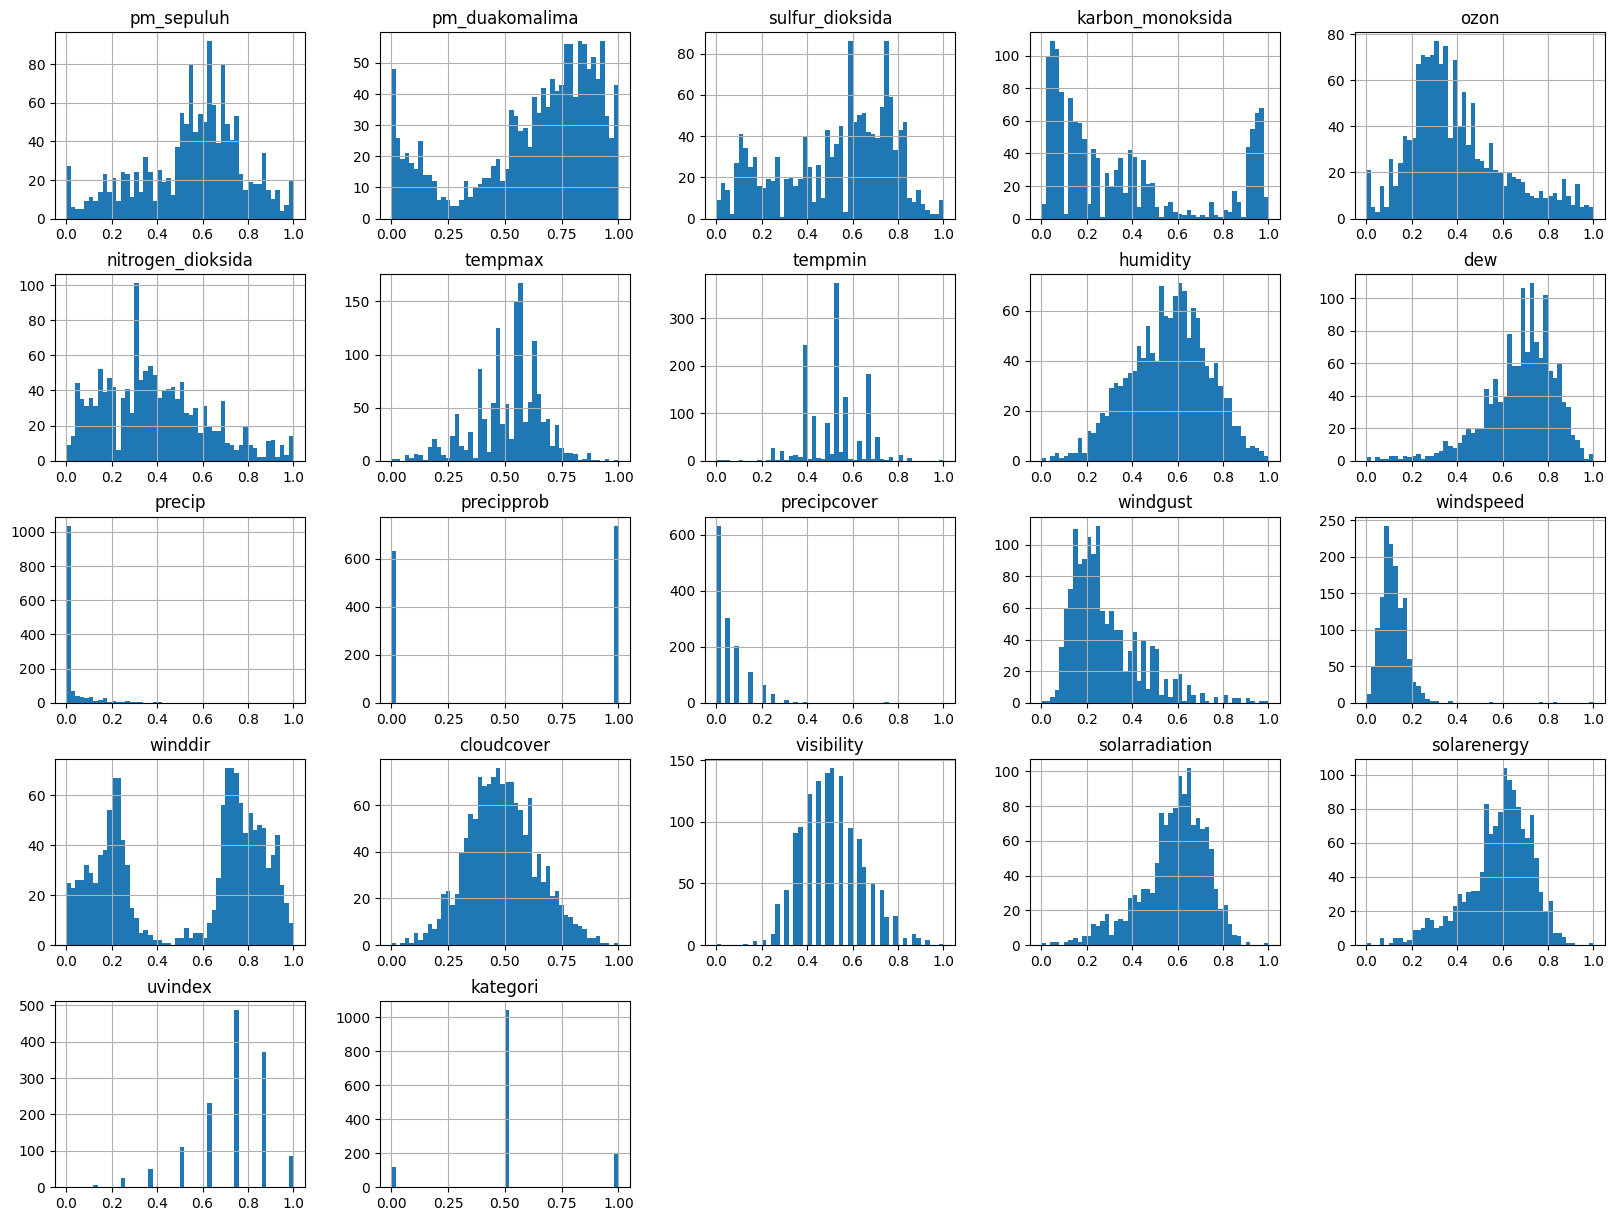

In [ ]:
#histogram, data spread
df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
# Data Splitting
polute_df = df.copy()
# Hapus kategori dengan jumlah sampel sangat sedikit
df_filtered = polute_df[~polute_df["kategori"].isin([0.25, 0.75])]
encoder = LabelEncoder()

# Pisahkan fitur dan target
X = df_filtered.drop(columns=["kategori"])  # Semua fitur kecuali target
y = encoder.fit_transform(df_filtered["kategori"].astype(str)).astype(int) # Target

# Split data menjadi Training (70%) dan sisanya (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split sisanya menjadi Testing (20%) dan Validation (10%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

# Cek ukuran hasil split
print("Training Set: ", X_train.shape)
print("Testing Set: ", X_test.shape)
print("Validation Set: ", X_val.shape)

Training Set:  (956, 21)
Testing Set:  (274, 21)
Validation Set:  (137, 21)


In [ ]:
df_filtered.describe(include = "all")

,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,tempmax,tempmin,humidity,dew,...,precipcover,windgust,windspeed,winddir,cloudcover,visibility,solarradiation,solarenergy,uvindex,kategori
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,...,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,0.556603,0.623875,0.530885,0.363931,0.399866,0.386739,0.516079,0.521845,0.560804,0.679363,...,0.061930,0.283655,0.118938,0.534397,0.488394,0.509951,0.584024,0.584497,0.730797,0.529627
std,0.220682,0.285390,0.242041,0.327776,0.209558,0.224803,0.147731,0.121821,0.173782,0.153534,...,0.091217,0.153808,0.063714,0.316453,0.152760,0.135209,0.145053,0.144092,0.167327,0.242078
min,0.000000,0.000000,0.000000,0.000000,0.006711,0.009091,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.434109,0.477833,0.354839,0.098765,0.255034,0.218182,0.448980,0.433071,0.443421,0.605042,...,0.000000,0.169972,0.081340,0.208159,0.387543,0.413793,0.513948,0.516981,0.625000,0.500000
50%,0.589147,0.709360,0.591398,0.234568,0.355705,0.363636,0.540816,0.535433,0.573684,0.705882,...,0.050042,0.240793,0.108453,0.695349,0.480969,0.517241,0.606170,0.607547,0.750000,0.500000
75%,0.697674,0.842365,0.731183,0.493827,0.503356,0.522727,0.622449,0.574803,0.681579,0.789916,...,0.099964,0.359773,0.151515,0.805764,0.587370,0.586207,0.683295,0.683019,0.875000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
##### no attributes removed #####

# K-Fold Cross Validation (10 folds)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Model Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Model Xgboost
xgb_model = XGBClassifier(eval_metric="mlogloss", random_state=42)
# Cross-validation accuracy
log_scores = cross_val_score(log_model, X_train, y_train, cv=kf, scoring='accuracy')
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation scores
# kfold scores
print("Logistic Regression K-Fold Accuracy: ", log_scores.mean())
print("Random Forest K-Fold Accuracy: ", rf_scores.mean())
print("XGBoost K-Fold Accuracy: ", xgb_scores.mean())
# Train final model
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train,y_train)
# Predictions
# logistic regression
y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)
y_pred_val_log = log_model.predict(X_val)
# random forest
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)
y_pred_val_rf = rf_model.predict(X_val)
# xgboost
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)
y_pred_val_xgb = xgb_model.predict(X_val)
# Accuracy scores
# logistic regression accuracies
accuracy_train_log = accuracy_score(y_train, y_pred_train_log)
accuracy_test_log = accuracy_score(y_test, y_pred_test_log)
accuracy_val_log = accuracy_score(y_val, y_pred_val_log)
print("\nLogisticRegression\n")
print("Training Accuracy:", accuracy_train_log)
print("Testing Accuracy:", accuracy_test_log)
print("Validation Accuracy:", accuracy_val_log)
# random forest accuracies
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
print("\nRandomForest\n")
print("Training Accuracy:", accuracy_train_rf)
print("Testing Accuracy:", accuracy_test_rf)
print("Validation Accuracy:", accuracy_val_rf)
# xgboost accuracies
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
accuracy_val_xgb = accuracy_score(y_val, y_pred_val_xgb)
print("\nXGBoost\n")
print("Training Accuracy:", accuracy_train_xgb)
print("Testing Accuracy:", accuracy_test_xgb)
print("Validation Accuracy:", accuracy_val_xgb)
# Classification report
print("Classification Report (Algo 1):\n", classification_report(y_test, y_pred_test_log))
print("Classification Report (Algo 2):\n", classification_report(y_test, y_pred_test_rf))
print("Classification Report (Algo 3):\n", classification_report(y_test, y_pred_test_xgb))

Logistic Regression K-Fold Accuracy:  0.9278947368421052
Random Forest K-Fold Accuracy:  0.9654934210526316
XGBoost K-Fold Accuracy:  0.9811732456140352

LogisticRegression

Training Accuracy: 0.9330543933054394
Testing Accuracy: 0.9233576642335767
Validation Accuracy: 0.9051094890510949

RandomForest

Training Accuracy: 1.0
Testing Accuracy: 0.9562043795620438
Validation Accuracy: 0.9708029197080292

XGBoost

Training Accuracy: 1.0
Testing Accuracy: 0.9890510948905109
Validation Accuracy: 0.9927007299270073
Classification Report (Algo 1):
               precision    recall  f1-score   support

           0       0.83      0.40      0.54        25
           1       0.94      0.98      0.96       208
           2       0.87      0.95      0.91        41

    accuracy                           0.92       274
   macro avg       0.88      0.78      0.80       274
weighted avg       0.92      0.92      0.91       274

Classification Report (Algo 2):
               precision    recall  f1-s

In [ ]:
##### with random projection #####
# Menggunakan Sparse Random Projection untuk reduksi dimensi
rp = SparseRandomProjection(n_components=17, random_state=42)
X_train_reduced = rp.fit_transform(X_train)
X_val_reduced = rp.transform(X_val)
X_test_reduced = rp.transform(X_test)


# Model Logistic Regression setelah reduksi dimensi
model_rp = LogisticRegression(max_iter=1000)
model_rp.fit(X_train_reduced, y_train)
y_pred_rp_test = model_rp.predict(X_test_reduced)
y_pred_rp_val = model_rp.predict(X_val_reduced)

# Evaluasi model setelah reduksi dimensi
print("\nPerformance Logistic Regression setelah Random Projection:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_rp_test))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_rp_val))
print(classification_report(y_test, y_pred_rp_test))

# Model Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_reduced, y_train)
y_pred_rf_test = model_rf.predict(X_test_reduced)
y_pred_rf_val = model_rf.predict(X_val_reduced)

print("\nPerformance Random Forest:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf_test))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_rf_val))
print(classification_report(y_test, y_pred_rf_test))

# Model XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_xgb.fit(X_train_reduced, y_train)
y_pred_xgb_test = model_xgb.predict(X_test_reduced)
y_pred_xgb_val = model_xgb.predict(X_val_reduced)

print("\nPerformance XGBoost:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_xgb_test))
print("Validation Accuracy:", accuracy_score(y_val, y_pred_xgb_val))
print(classification_report(y_test, y_pred_xgb_test))


# kfold accuracy

# # Encode labels to avoid class mismatches
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Use StratifiedKFold (but with a check for rare classes)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

logistic_accuracies = []
rf_accuracies = []
xgb_accuracies = []

for train_index, test_index in kf.split(X, y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Ensure all classes exist in the training set
    unique_classes = np.unique(y_train)
    missing_classes = set(np.unique(y_encoded)) - set(unique_classes)

    if missing_classes:
        print(f"Missing classes in this fold: {missing_classes}. Skipping this fold.")
        continue  # Skip this fold if a class is missing

    # Dimensionality Reduction using Sparse Random Projection
    rp = SparseRandomProjection(n_components=17, random_state=42)
    X_train_reduced = rp.fit_transform(X_train)
    X_test_reduced = rp.transform(X_test)

    # Logistic Regression Model
    model_rp = LogisticRegression(max_iter=1000)
    model_rp.fit(X_train_reduced, y_train)
    logistic_accuracies.append(accuracy_score(y_test, model_rp.predict(X_test_reduced)))

    # Random Forest Model
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    model_rf.fit(X_train_reduced, y_train)
    rf_accuracies.append(accuracy_score(y_test, model_rf.predict(X_test_reduced)))

    # XGBoost Model
    model_xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
    model_xgb.fit(X_train_reduced, y_train)
    xgb_accuracies.append(accuracy_score(y_test, model_xgb.predict(X_test_reduced)))

# Print average performance (check if any folds were skipped)
if logistic_accuracies:
    print("\nAverage Performance Logistic Regression:", np.mean(logistic_accuracies))
if rf_accuracies:
    print("Average Performance Random Forest:", np.mean(rf_accuracies))
if xgb_accuracies:
    print("Average Performance XGBoost:", np.mean(xgb_accuracies))


Performance Logistic Regression setelah Random Projection:
Test Accuracy: 0.927007299270073
Validation Accuracy: 0.8905109489051095
              precision    recall  f1-score   support

           0       0.91      0.40      0.56        25
           1       0.94      0.98      0.96       208
           2       0.85      0.98      0.91        41

    accuracy                           0.93       274
   macro avg       0.90      0.79      0.81       274
weighted avg       0.93      0.93      0.92       274


Performance Random Forest:
Test Accuracy: 0.9197080291970803
Validation Accuracy: 0.8978102189781022
              precision    recall  f1-score   support

           0       0.91      0.40      0.56        25
           1       0.93      0.97      0.95       208
           2       0.87      0.98      0.92        41

    accuracy                           0.92       274
   macro avg       0.90      0.78      0.81       274
weighted avg       0.92      0.92      0.91       274



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:03:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Performance XGBoost:
Test Accuracy: 0.9306569343065694
Validation Accuracy: 0.9051094890510949
              precision    recall  f1-score   support

           0       0.86      0.48      0.62        25
           1       0.94      0.98      0.96       208
           2       0.89      0.98      0.93        41

    accuracy                           0.93       274
   macro avg       0.90      0.81      0.84       274
weighted avg       0.93      0.93      0.92       274


Average Performance Logistic Regression: 0.9195148132245599
Average Performance Random Forest: 0.9173250322026621
Average Performance XGBoost: 0.9282954057535422


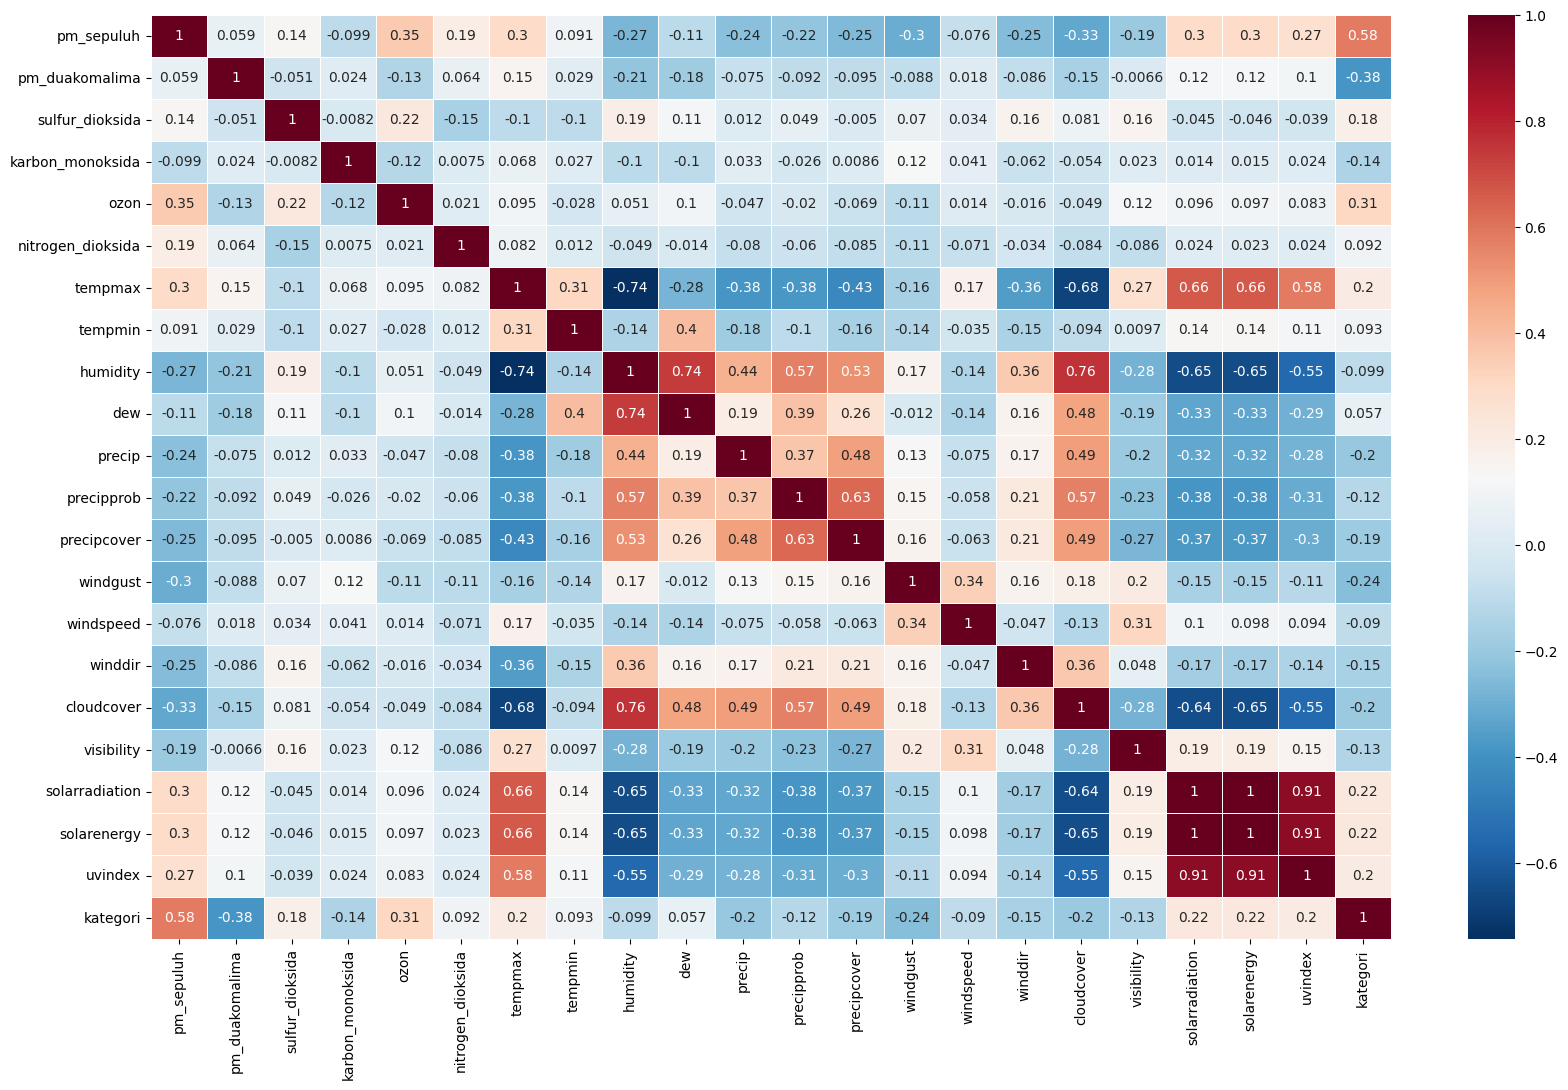

In [ ]:
## Show correlation
fig, ax = plt.subplots(figsize = (20, 12)) #Size of plot
ax = sns.heatmap(polute_df.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

In [ ]:
### pemisahan dengan pearson corr 0.3 > a > -0.3 ###
# Specify the target attribute
target_attribute = 'kategori'  # Change as needed
correlation_matrix = df_filtered.corr()
# Find attributes with low correlation to the target attribute in range -0.3 to 0.3
low_corr_mask = (correlation_matrix[target_attribute] > -0.3) & (correlation_matrix[target_attribute] < 0.3)

to_remove = correlation_matrix.index[low_corr_mask].tolist()

# Remove identified attributes
filtered_df = df_filtered.drop(columns=to_remove)

# Memisahkan fitur dan target

X_fil = filtered_df.drop(columns=["kategori"])
encoder = LabelEncoder()
y_fil = encoder.fit_transform(filtered_df["kategori"])

# Split data (70% train, 20% test, 10% validation)
X_train, X_temp, y_train, y_temp = train_test_split(X_fil, y_fil, test_size=0.3, random_state=42, stratify=y_fil)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

Encoded label mapping:
0.0 -> 0
0.5 -> 1
1.0 -> 2

Sample of encoded labels (y_fil):
[0 1 0 1 1 0 0 0 0 0]


In [ ]:
# Model Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Model Xgboost
xgb_model = XGBClassifier(eval_metric="mlogloss", random_state=42)

# Train final model
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train,y_train)
# Predictions
# logistic regression
y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)
y_pred_val_log = log_model.predict(X_val)
# random forest
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)
y_pred_val_rf = rf_model.predict(X_val)
# xgboost
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)
y_pred_val_xgb = xgb_model.predict(X_val)
# Accuracy scores
# logistic regression accuracies
accuracy_train_log = accuracy_score(y_train, y_pred_train_log)
accuracy_test_log = accuracy_score(y_test, y_pred_test_log)
accuracy_val_log = accuracy_score(y_val, y_pred_val_log)
print("\nLogisticRegression\n")
print("Training Accuracy:", accuracy_train_log)
print("Testing Accuracy:", accuracy_test_log)
print("Validation Accuracy:", accuracy_val_log)
# random forest accuracies
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
print("\nRandomForest\n")
print("Training Accuracy:", accuracy_train_rf)
print("Testing Accuracy:", accuracy_test_rf)
print("Validation Accuracy:", accuracy_val_rf)
# xgboost accuracies
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
accuracy_val_xgb = accuracy_score(y_val, y_pred_val_xgb)
print("\nXGBoost\n")
print("Training Accuracy:", accuracy_train_xgb)
print("Testing Accuracy:", accuracy_test_xgb)
print("Validation Accuracy:", accuracy_val_xgb)
# Classification report
print("Classification Report (Algo 1):\n", classification_report(y_test, y_pred_test_log))
print("Classification Report (Algo 2):\n", classification_report(y_test, y_pred_test_rf))
print("Classification Report (Algo 3):\n", classification_report(y_test, y_pred_test_xgb))
# Use StratifiedKFold (but with a check for rare classes)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

logistic_accuracies = []
rf_accuracies = []
xgb_accuracies = []

for train_index, test_index in kf.split(X_fil, y_fil):
    X_train, X_test = X_fil.iloc[train_index], X_fil.iloc[test_index]
    y_train, y_test = y_fil[train_index], y_fil[test_index]

    # Ensure all classes exist in the training set
    unique_classes = np.unique(y_train)
    missing_classes = set(np.unique(y_encoded)) - set(unique_classes)

    if missing_classes:
        print(f"Missing classes in this fold: {missing_classes}. Skipping this fold.")
        continue  # Skip this fold if a class is missing

    # Logistic Regression Model
    model_rp = LogisticRegression(max_iter=1000)
    model_rp.fit(X_train, y_train)
    logistic_accuracies.append(accuracy_score(y_test, model_rp.predict(X_test)))

    # Random Forest Model
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    model_rf.fit(X_train, y_train)
    rf_accuracies.append(accuracy_score(y_test, model_rf.predict(X_test)))

    # XGBoost Model
    model_xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
    model_xgb.fit(X_train, y_train)
    xgb_accuracies.append(accuracy_score(y_test, model_xgb.predict(X_test)))

# Print average performance (check if any folds were skipped)
if logistic_accuracies:
    print("\nAverage Performance Logistic Regression:", np.mean(logistic_accuracies))
if rf_accuracies:
    print("Average Performance Random Forest:", np.mean(rf_accuracies))
if xgb_accuracies:
    print("Average Performance XGBoost:", np.mean(xgb_accuracies))


LogisticRegression

Training Accuracy: 0.9142259414225942
Testing Accuracy: 0.8613138686131386
Validation Accuracy: 0.9124087591240876

RandomForest

Training Accuracy: 0.9989539748953975
Testing Accuracy: 0.9708029197080292
Validation Accuracy: 0.9635036496350365

XGBoost

Training Accuracy: 0.9989539748953975
Testing Accuracy: 0.9781021897810219
Validation Accuracy: 0.9708029197080292
Classification Report (Algo 1):
               precision    recall  f1-score   support

           0       0.25      0.08      0.12        12
           1       0.90      0.95      0.93       105
           2       0.77      0.85      0.81        20

    accuracy                           0.86       137
   macro avg       0.64      0.63      0.62       137
weighted avg       0.83      0.86      0.84       137

Classification Report (Algo 2):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.98      0.98      0.98       105

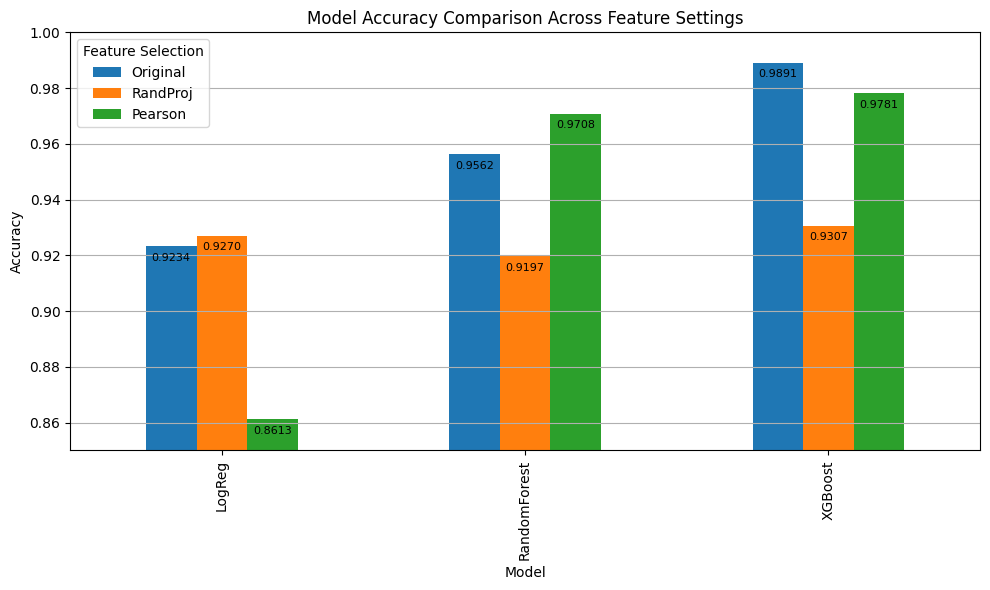

In [ ]:
# Re-import necessary packages after kernel reset
import matplotlib.pyplot as plt
import pandas as pd

# Accuracy data
models = ['LogReg', 'RandomForest', 'XGBoost']
accuracies = {
    'Original': [0.9234, 0.9562, 0.9891],
    'RandProj': [0.9270, 0.9197, 0.9307],
    'Pearson': [0.8613, 0.9708, 0.9781]
}

# Convert to DataFrame
acc_df = pd.DataFrame(accuracies, index=models)

# Plot bar chart
ax = acc_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Accuracy Comparison Across Feature Settings')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.85, 1.0)
plt.grid(axis='y')
plt.legend(title='Feature Selection')
plt.tight_layout()

# Add accuracy labels inside bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=8, color='black', xytext=(0, -12),
                textcoords='offset points')

plt.show()


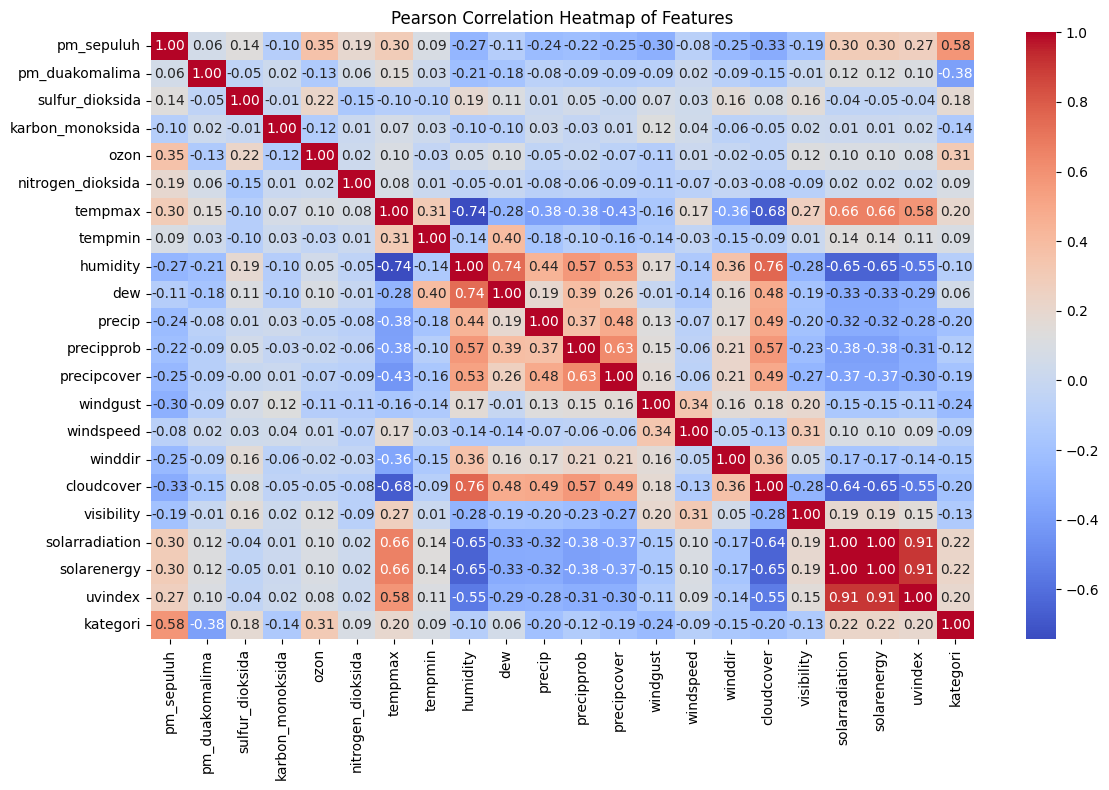

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi antar fitur
corr_matrix = df.corr()

# Plot heatmap untuk semua fitur
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap of Features')
plt.tight_layout()
plt.show()


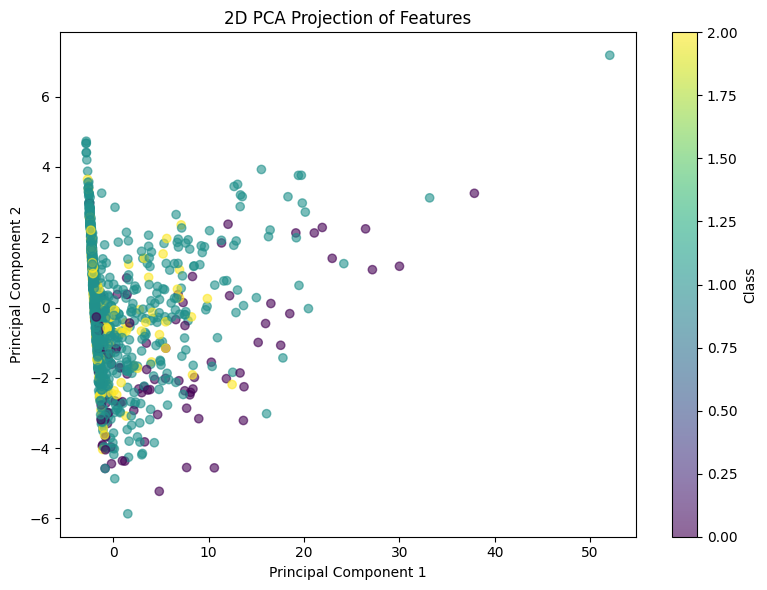

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

# Normalisasi dulu
X_scaled = RobustScaler().fit_transform(X)

# Gunakan PCA untuk reduksi ke 2 dimensi untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Features')
plt.colorbar(label='Class')
plt.tight_layout()
plt.show()


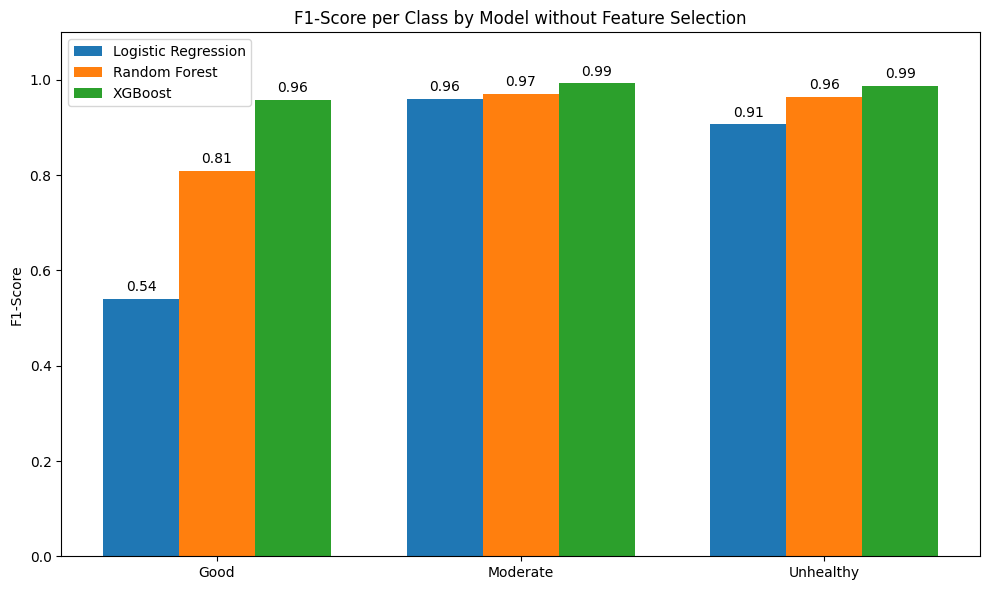

In [ ]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Prediksi dengan masing-masing model
y_pred_lr = log_model.predict(X_test)     # pastikan model_lr adalah Logistic Regression
y_pred_rf = rf_model.predict(X_test)     # pastikan model_rf adalah Random Forest
y_pred_xgb = xgb_model.predict(X_test)   # pastikan model_xgb adalah XGBoost
# Hitung F1-score per kelas
f1_lr = f1_score(y_test, y_pred_lr, average=None)
f1_rf = f1_score(y_test, y_pred_rf, average=None)
f1_xgb = f1_score(y_test, y_pred_xgb, average=None)

# Visualisasi
labels = ['Good', 'Moderate', 'Unhealthy']
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(10,6))
bars_lr = plt.bar(x - width, f1_lr, width, label='Logistic Regression')
bars_rf = plt.bar(x, f1_rf, width, label='Random Forest')
bars_xgb = plt.bar(x + width, f1_xgb, width, label='XGBoost')

# Tambahkan nilai di atas bar
for bars in [bars_lr, bars_rf, bars_xgb]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.2f}', ha='center', va='bottom')

plt.ylabel('F1-Score')
plt.title('F1-Score per Class by Model without Feature Selection')
plt.xticks(x, labels)
plt.ylim(0, 1.10)
plt.legend()
plt.tight_layout()
plt.show()


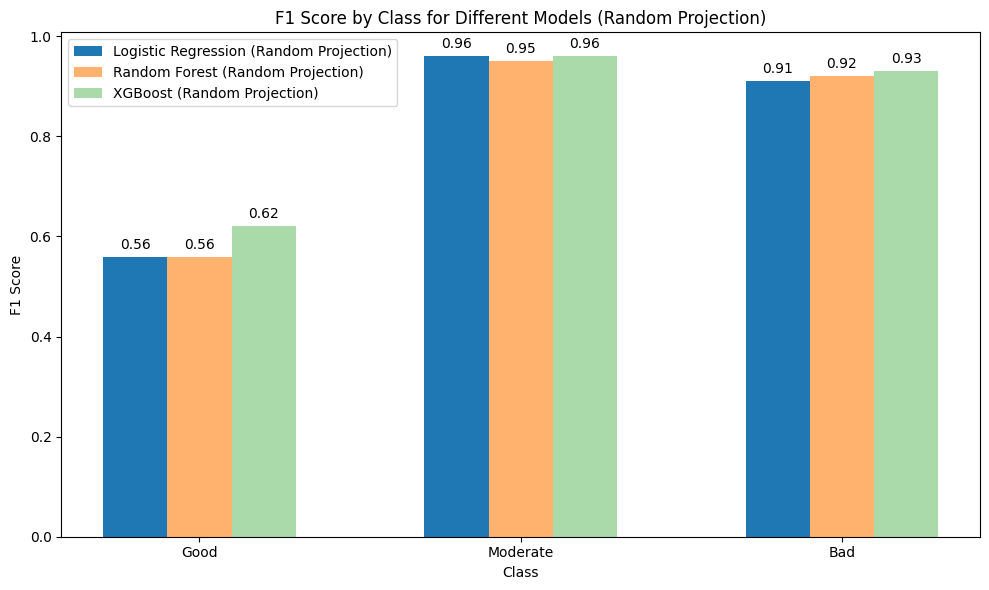

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for F1 scores (Random Projection only)
labels = ['Good', 'Moderate', 'Bad']
f1_scores = {
    'Logistic Regression': [0.56, 0.96, 0.91],
    'Random Forest': [0.56, 0.95, 0.92],
    'XGBoost': [0.62, 0.96, 0.93]
}

# Bar width and X axis positions
bar_width = 0.2
index = np.arange(len(labels))

# Function to add text labels inside the bars
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Creating subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Color transparency levels for different models
alpha_values = {'Logistic Regression': 1, 'Random Forest': 0.6, 'XGBoost': 0.4}

# Plotting bars for each model (only for Random Projection)
for i, (model, scores) in enumerate(f1_scores.items()):
    bars = ax.bar(index + (i - 1) * bar_width, scores, bar_width, label=f'{model} (Random Projection)', alpha=alpha_values[model])
    add_labels(bars)

# Labels and title
ax.set_xlabel('Class')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score by Class for Different Models (Random Projection)')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


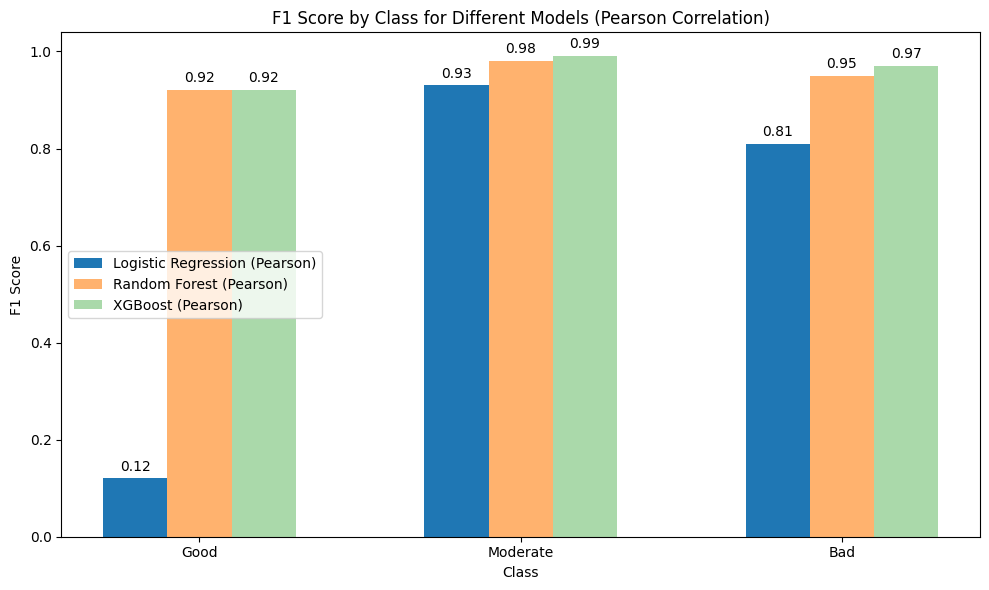

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for F1 scores (Pearson only)
labels = ['Good', 'Moderate', 'Bad']
f1_scores = {
    'Logistic Regression': [0.12, 0.93, 0.81],
    'Random Forest': [0.92, 0.98, 0.95],
    'XGBoost': [0.92, 0.99, 0.97]
}

# Bar width and X axis positions
bar_width = 0.2
index = np.arange(len(labels))

# Function to add text labels inside the bars
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Creating subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Color transparency levels for different models
alpha_values = {'Logistic Regression': 1, 'Random Forest': 0.6, 'XGBoost': 0.4}

# Plotting bars for each model (only for Pearson)
for i, (model, scores) in enumerate(f1_scores.items()):
    bars = ax.bar(index + (i - 1) * bar_width, scores, bar_width, label=f'{model} (Pearson)', alpha=alpha_values[model])
    add_labels(bars)

# Labels and title
ax.set_xlabel('Class')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score by Class for Different Models (Pearson Correlation)')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


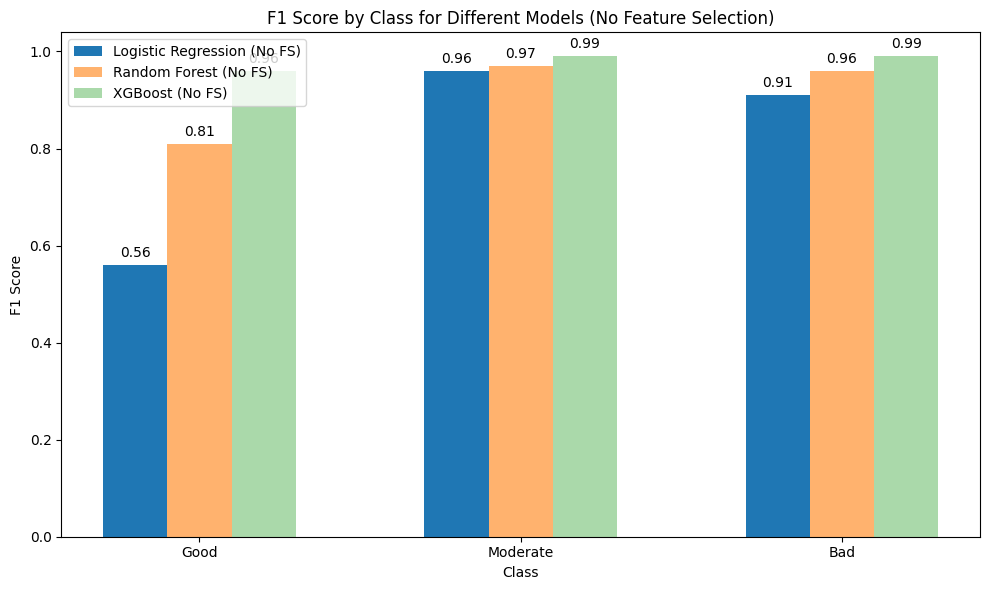

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for F1 scores (No Feature Selection only)
labels = ['Good', 'Moderate', 'Bad']
f1_scores = {
    'Logistic Regression': [0.56, 0.96, 0.91],
    'Random Forest': [0.81, 0.97, 0.96],
    'XGBoost': [0.96, 0.99, 0.99]
}

# Bar width and X axis positions
bar_width = 0.2
index = np.arange(len(labels))

# Function to add text labels inside the bars
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Creating subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Color transparency levels for different models
alpha_values = {'Logistic Regression': 1, 'Random Forest': 0.6, 'XGBoost': 0.4}

# Plotting bars for each model (only for No FS)
for i, (model, scores) in enumerate(f1_scores.items()):
    bars = ax.bar(index + (i - 1) * bar_width, scores, bar_width, label=f'{model} (No FS)', alpha=alpha_values[model])
    add_labels(bars)

# Labels and title
ax.set_xlabel('Class')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score by Class for Different Models (No Feature Selection)')
ax.set_xticks(index)
ax.set_xticklabels(labels)

# Move the legend to the top-left corner
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=1)

plt.tight_layout()
plt.show()
